Exploring and Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('AirPassengers.csv')

#Preprocessing the data
print(df.isnull())
print(df.info())
print(df.describe())

# Convert the 'Month' column to datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


     Month  #Passengers
0    False        False
1    False        False
2    False        False
3    False        False
4    False        False
..     ...          ...
139  False        False
140  False        False
141  False        False
142  False        False
143  False        False

[144 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


visualizing trends

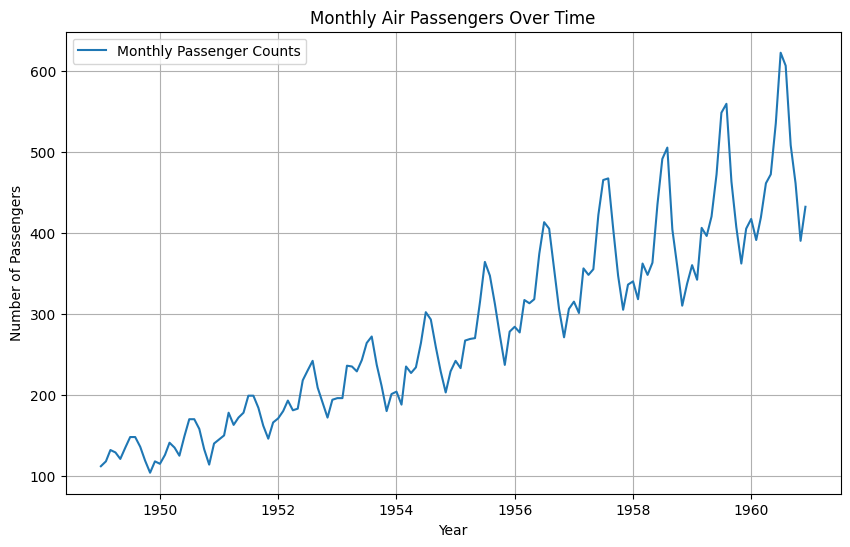

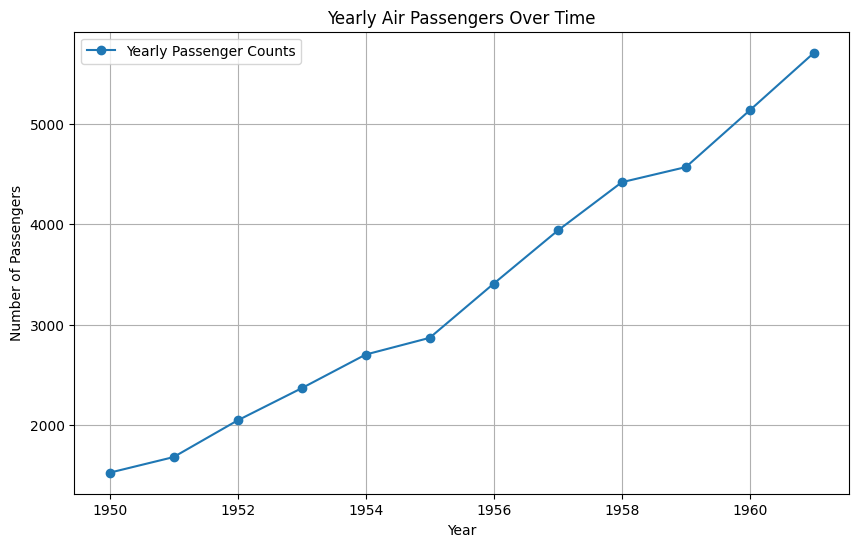

In [ ]:
# Visualize monthly passenger counts over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Monthly Passenger Counts')
plt.title('Monthly Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.legend()
plt.show()

# Resample data to yearly frequency and visualize yearly passenger counts over time
yearly_passengers = df['#Passengers'].resample('Y').sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_passengers.index, yearly_passengers, label='Yearly Passenger Counts', marker='o')
plt.title('Yearly Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.legend()
plt.show()

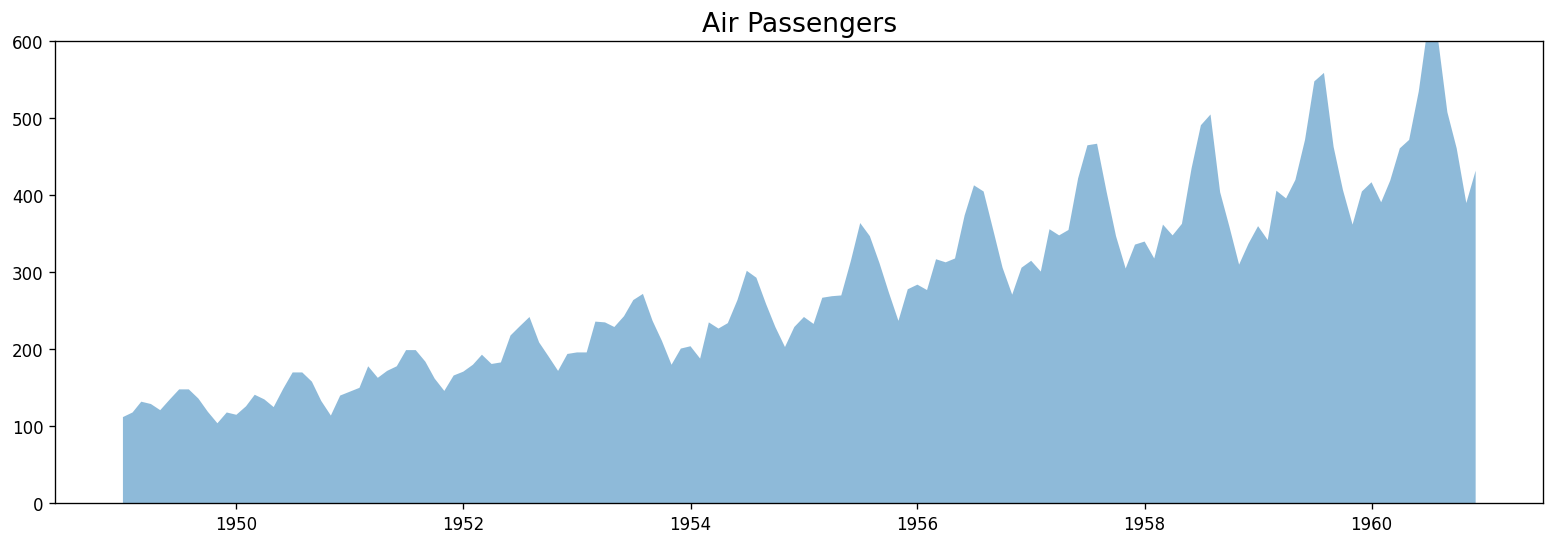

In [ ]:
x = df.index.values
y1 = df['#Passengers'].values

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=0, where=(y1 >= 0), alpha=0.5, interpolate=True)
plt.ylim(0, 600)
plt.title('Air Passengers', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

normalizing data, Dividing data

Train dataset size: 92
Validation dataset size: 19
Test dataset size: 21


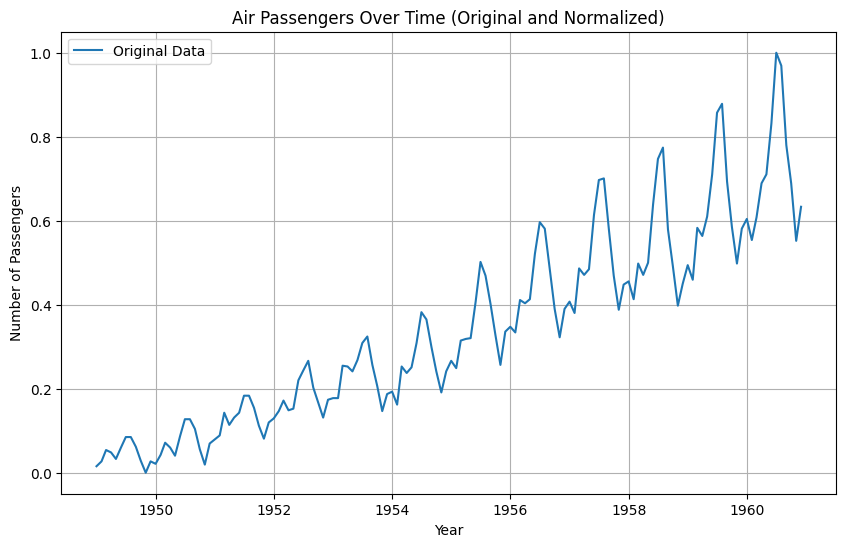

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader

class AirPassengersDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.sequence_length]
        y = self.data[idx+self.sequence_length]
        return x, y

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize the 'Passengers' column
scaler = MinMaxScaler()
df['#Passengers'] = scaler.fit_transform(df['#Passengers'].values.reshape(-1,1))
data_tensor = torch.Tensor(df['#Passengers'].values).view(-1, 1)

# Define sequence length and create dataset
sequence_length = 12  # Number of timesteps to look back
dataset = AirPassengersDataset(data_tensor, sequence_length)


train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(dataset))
val_size = int(val_ratio * len(dataset))
test_size = int(test_ratio * len(dataset))

train_dataset = torch.utils.data.Subset(dataset, range(train_size))
val_dataset = torch.utils.data.Subset(dataset, range(train_size, train_size + val_size))
test_dataset = torch.utils.data.Subset(dataset, range(train_size + val_size, len(dataset)))


# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Plot the original and normalized data trends
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.title('Air Passengers Over Time (Original and Normalized)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define hyperparameters
input_size = 1
hidden_size = 100
num_layers = 2
learning_rate = 0.005
num_epochs = 75

# Instantiate the model
lstm_model = LSTMModel(input_size, hidden_size, num_layers)


Epoch 1/75, Train Loss: 0.0367, Val Loss: 0.0550
Epoch 2/75, Train Loss: 0.0267, Val Loss: 0.1194
Epoch 3/75, Train Loss: 0.0272, Val Loss: 0.0852
Epoch 4/75, Train Loss: 0.0226, Val Loss: 0.0428
Epoch 5/75, Train Loss: 0.0221, Val Loss: 0.0437
Epoch 6/75, Train Loss: 0.0187, Val Loss: 0.0539
Epoch 7/75, Train Loss: 0.0156, Val Loss: 0.0145
Epoch 8/75, Train Loss: 0.0114, Val Loss: 0.0123
Epoch 9/75, Train Loss: 0.0081, Val Loss: 0.0380
Epoch 10/75, Train Loss: 0.0076, Val Loss: 0.0139
Epoch 11/75, Train Loss: 0.0065, Val Loss: 0.0143
Epoch 12/75, Train Loss: 0.0060, Val Loss: 0.0145
Epoch 13/75, Train Loss: 0.0060, Val Loss: 0.0165
Epoch 14/75, Train Loss: 0.0055, Val Loss: 0.0120
Epoch 15/75, Train Loss: 0.0052, Val Loss: 0.0151
Epoch 16/75, Train Loss: 0.0054, Val Loss: 0.0116
Epoch 17/75, Train Loss: 0.0052, Val Loss: 0.0127
Epoch 18/75, Train Loss: 0.0051, Val Loss: 0.0247
Epoch 19/75, Train Loss: 0.0054, Val Loss: 0.0116
Epoch 20/75, Train Loss: 0.0047, Val Loss: 0.0209
Epoch 21/

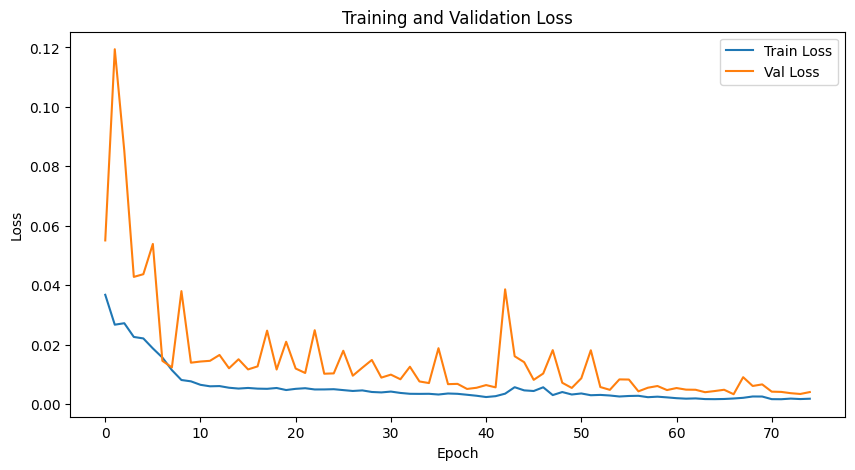

In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate, betas = ([0.9, 0.99]))

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lstm_model.to(device)

best_val_loss = float('inf')
best_model_path = 'best_model.pt'  # Path to save the best model
# Training loop
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    lstm_model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = lstm_model(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Store train loss for the epoch

    lstm_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = lstm_model(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)  # Store val loss for the epoch

    # Save the model if the validation loss is lower than the best validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(lstm_model.state_dict(), best_model_path)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the best model for testing
best_model = LSTMModel(input_size, hidden_size, num_layers)
best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)

# Evaluate the best model on the test set
best_model.eval()
test_losses = []
predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = best_model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        test_losses.append(loss.item())
        predictions.extend(outputs.cpu().numpy())

# Calculate performance metrics
true_values = np.array([target for _, target in test_dataset])
predictions = np.concatenate(predictions)

mse = mean_squared_error(true_values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_values, predictions)
mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')


Mean Squared Error (MSE): 0.0091
Root Mean Squared Error (RMSE): 0.0955
Mean Absolute Error (MAE): 0.0746
Mean Absolute Percentage Error (MAPE): 19.9414%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([21, 1, 1])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


R2 Score: 0.5249


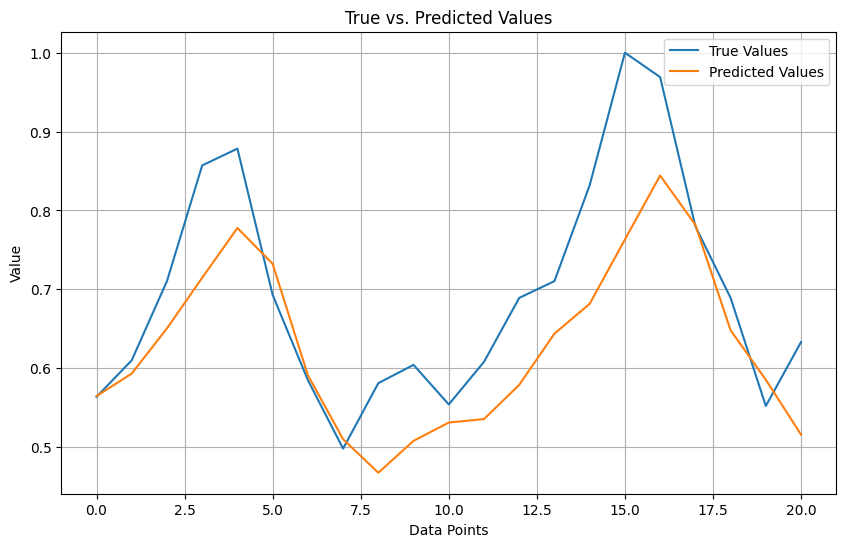

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(true_values, predictions)

print(f'R2 Score: {r2:.4f}')

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('True vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


#HyperParameterTuning

In [ ]:
import itertools

# Define hyperparameters to tune
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
hidden_sizes = [50, 100, 150, 200]
num_epochs_list = [50, 100, 150, 200]

best_loss = float('inf')
best_hyperparameters = {}

for lr, hidden_size, num_epochs in itertools.product(learning_rates, hidden_sizes, num_epochs_list):
    # Instantiate the model
    lstm_model = LSTMModel(input_size, hidden_size, num_layers)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(lstm_model.parameters(), lr=lr)

    # Move model to GPU if available
    lstm_model.to(device)

    # Training loop
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        # Training phase
        lstm_model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = lstm_model(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation phase
        lstm_model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = lstm_model(inputs)
                loss = criterion(outputs.squeeze(), targets.squeeze())
                val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

    # Check if current hyperparameters result in the best validation loss
    if val_loss < best_loss:
        best_loss = val_loss
        best_hyperparameters = {'learning_rate': lr, 'hidden_size': hidden_size, 'num_epochs': num_epochs}

print("Best hyperparameters:", best_hyperparameters)


Best hyperparameters: {'learning_rate': 0.005, 'hidden_size': 200, 'num_epochs': 200}


..

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define hyperparameters from above
input_size = 1
hidden_size = 200
num_layers = 2
learning_rate = 0.005
num_epochs = 200

# Instantiate the model
lstm_model = LSTMModel(input_size, hidden_size, num_layers)


Epoch 1/200, Train Loss: 0.0485, Val Loss: 0.0592
Epoch 2/200, Train Loss: 0.0214, Val Loss: 0.0529
Epoch 3/200, Train Loss: 0.0184, Val Loss: 0.0791
Epoch 4/200, Train Loss: 0.0201, Val Loss: 0.0135
Epoch 5/200, Train Loss: 0.0101, Val Loss: 0.0159
Epoch 6/200, Train Loss: 0.0088, Val Loss: 0.0225
Epoch 7/200, Train Loss: 0.0076, Val Loss: 0.0126
Epoch 8/200, Train Loss: 0.0077, Val Loss: 0.0118
Epoch 9/200, Train Loss: 0.0069, Val Loss: 0.0134
Epoch 10/200, Train Loss: 0.0053, Val Loss: 0.0419
Epoch 11/200, Train Loss: 0.0075, Val Loss: 0.0116
Epoch 12/200, Train Loss: 0.0055, Val Loss: 0.0113
Epoch 13/200, Train Loss: 0.0054, Val Loss: 0.0148
Epoch 14/200, Train Loss: 0.0041, Val Loss: 0.0097
Epoch 15/200, Train Loss: 0.0047, Val Loss: 0.0105
Epoch 16/200, Train Loss: 0.0043, Val Loss: 0.0185
Epoch 17/200, Train Loss: 0.0061, Val Loss: 0.0083
Epoch 18/200, Train Loss: 0.0050, Val Loss: 0.0171
Epoch 19/200, Train Loss: 0.0041, Val Loss: 0.0070
Epoch 20/200, Train Loss: 0.0043, Val Lo

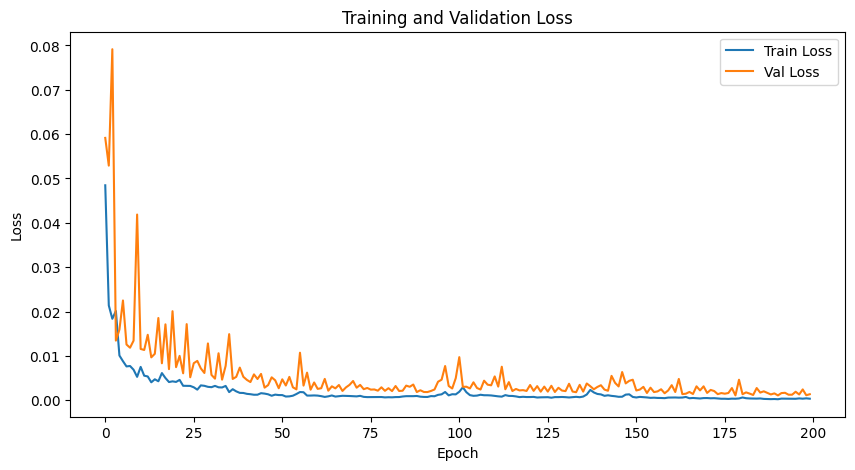

In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate, betas = ([0.9, 0.99]))

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lstm_model.to(device)

best_val_loss = float('inf')
best_model_path = 'best_model.pt'  # Path to save the best model
# Training loop
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    lstm_model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = lstm_model(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Store train loss for the epoch

    lstm_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = lstm_model(inputs)
            loss = criterion(outputs.squeeze(), targets.squeeze())
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)  # Store val loss for the epoch

    # Save the model if the validation loss is lower than the best validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(lstm_model.state_dict(), best_model_path)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the best model for testing
best_model = LSTMModel(input_size, hidden_size, num_layers)
best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)

# Evaluate the best model on the test set
best_model.eval()
test_losses = []
predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = best_model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        test_losses.append(loss.item())
        predictions.extend(outputs.cpu().numpy())

# Calculate performance metrics
true_values = np.array([target for _, target in test_dataset])
predictions = np.concatenate(predictions)

mse = mean_squared_error(true_values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_values, predictions)
mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')


Mean Squared Error (MSE): 0.0048
Root Mean Squared Error (RMSE): 0.0694
Mean Absolute Error (MAE): 0.0561
Mean Absolute Percentage Error (MAPE): 21.5906%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([21, 1, 1])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


R2 Score: 0.7491


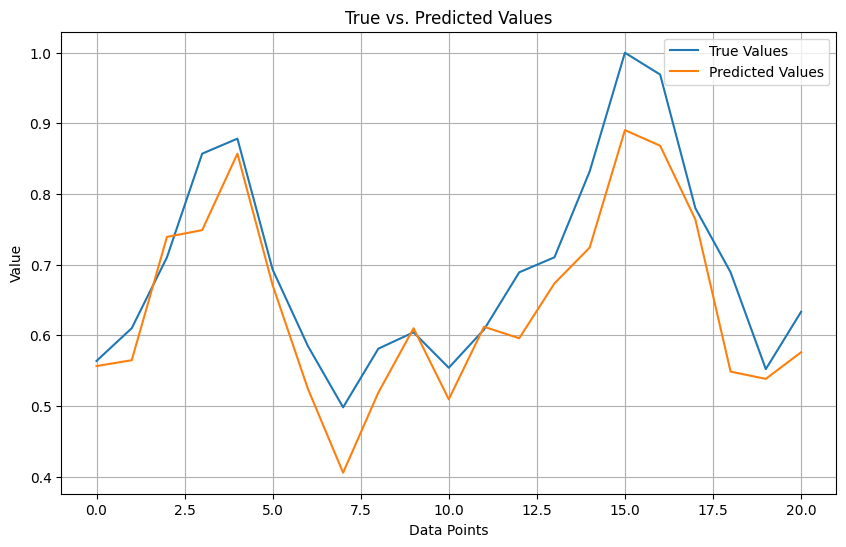

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(true_values, predictions)

print(f'R2 Score: {r2:.4f}')

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('True vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
